# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [21]:
# If you are running this on your local computer, wet your workign directory to 
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer. 
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/hcp_data")

# If you are running this on Colab, then use something like this.
# system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

#library(tidyverse)
#library(GGally)
d0 = read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 = d0[c("Subject","Gender","Flanker_Unadj","FS_Tot_WM_Vol","FS_Total_GM_Vol")] %>% drop_na()
head(d1)

Warning message:
"package 'GGally' was built under R version 4.2.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


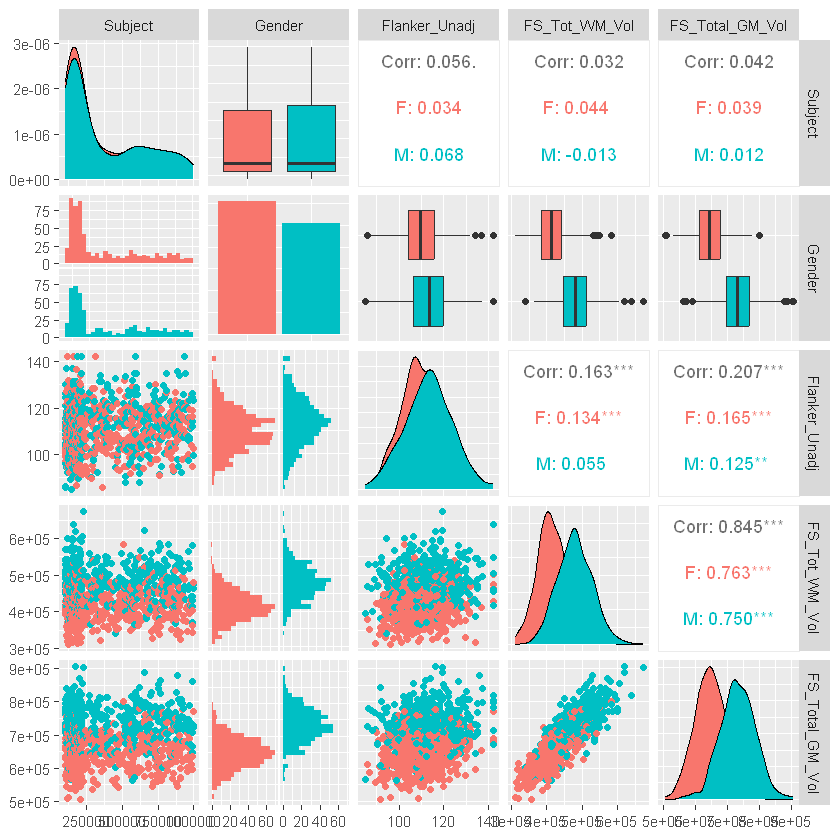

In [24]:
ggpairs(d1,aes(color=Gender))


> Subjects does not seem to correlate with anything.
Being female seems to correlate less white and gray matter, but nothing else.
Flanker Task doesn't seem to correlate with anything.
White matter seems to correlate strongly positively with gray matter.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [41]:
#INSERT CODE HERE
lm1 <- lm(Flanker_Unadj~FS_Total_GM_Vol,data=d1)
summary(lm1)
lm1_coef = coef(lm1)
lm1_coef
lm1_confint = confint(lm1)
lm1_confint


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> The intercept mean is 90.256 with 95% CI [84.289,96.224].
The B1 mean is 3.110e-05 with 95% CI [2.244e-05,3.976e-05].
Gray matter appears to be statistically associated with flanker task performance.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula = 'y ~ x'


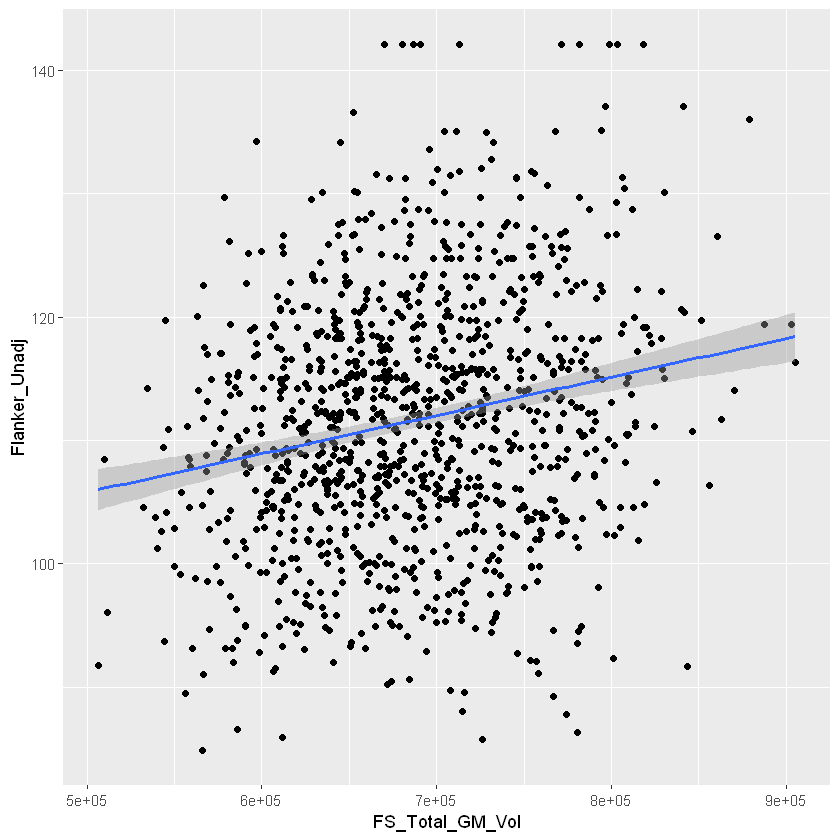

In [46]:
ggplot(lm1,aes(x=FS_Total_GM_Vol,y=Flanker_Unadj)) +
geom_point() +
geom_smooth(method='lm',se=TRUE)


> The regression line is going through the middle but the data points are spread all over the place like a circle.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> The linear regression accounting for only gray matter does not appear all that useful for statistical analysis. It would likely be better to use an additive or multiplicative model.

**DUE:** 5pm EST, February 27, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*